Draft: Queens is a borough of NYC. It contains the two NYC airports and is considered an "outer borough". The purpose of this notebook is to do data wrangling on a dataset containing geojson and shp files of truck routes in NYC. Nodes will be intersections of routes.

https://data.cityofnewyork.us/Transportation/New-York-City-Truck-Routes/jjja-shxy/about_data

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#networkx graph computing library
import networkx as nx
import osmnx as ox
import nxviz as nv
import geopandas as gp
import scipy.stats as stats

In [4]:
truckgeo = gp.read_file("New York City Truck Routes_20240606.geojson")

<AxesSubplot:>

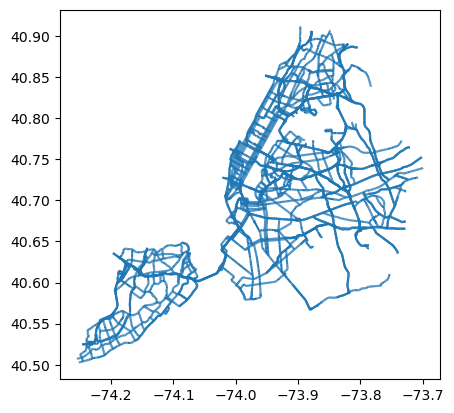

In [40]:
truckgeo.plot()

We restrict to truck routes just in Queens. The website www.mapshaper.org was used to easily convert geojson and shp files, as networkx works easily with shp, but the metadata in the geojson may be useful.

In [9]:
queensdf = truckgeo[truckgeo['boroname']=='Queens']

In [12]:
queensdf

,truckroute,coun_dist,thrutunl,objectid_1,thrubrg,ltdlocal,streetcode,localbrg,borocd,restrictio,...,boroname,thruexwy,routetype,localtunl,borocode,street,segmentid,nyc_reg,cong_dist,geometry
17561,Y,28.0,None,17562.0,None,None,462890,None,410.0,None,...,Queens,None,Through,None,4.0,SOUTH CONDUIT AVENUE,0054957,"NYCDOT Traffic Rules, Section 4-13-(b)(1)",5.0,"MULTILINESTRING ((-73.81733 40.66489, -73.8167..."
17562,Y,29.0,None,17563.0,None,None,411855,None,409.0,None,...,Queens,None,Through,None,4.0,VAN WYCK EXPWY SB EN MAIN ST,0132494,"NYCDOT Traffic Rules, Section 4-13-(b)(1)",6.0,"MULTILINESTRING ((-73.81939 40.70765, -73.8188..."
17563,Y,20.0,None,17564.0,None,None,452390,None,407.0,None,...,Queens,None,Local,None,4.0,KISSENA BOULEVARD,0091299,"NYCDOT Traffic Rules, Section 4-13-(b)(2)",6.0,"MULTILINESTRING ((-73.82472 40.75549, -73.8239..."
17564,Y,27.0,None,17565.0,None,None,449690,None,412.0,None,...,Queens,None,Through,None,4.0,HILLSIDE AVENUE,0060907,"NYCDOT Traffic Rules, Section 4-13-(b)(1)",5.0,"MULTILINESTRING ((-73.77800 40.71405, -73.7773..."
17565,Y,27.0,None,17566.0,None,None,457190,None,412.0,None,...,Queens,None,Local,None,4.0,GUY R BREWER BOULEVARD,0059237,"NYCDOT Traffic Rules, Section 4-13-(b)(2)",5.0,"MULTILINESTRING ((-73.78302 40.68428, -73.7826..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32934,Y,31.0,None,0.0,None,None,464760,None,413.0,None,...,Queens,None,Through,None,4.0,SUNRISE HIGHWAY,0171670,"NYCDOT Traffic Rules, Section 4-13-(b)(1)",5.0,"MULTILINESTRING ((-73.74097 40.66580, -73.7412..."
32935,Y,31.0,None,0.0,None,None,464760,None,413.0,None,...,Queens,None,Through,None,4.0,SUNRISE HIGHWAY,0171670,"NYCDOT Traffic Rules, Section 4-13-(b)(1)",5.0,"MULTILINESTRING ((-73.74097 40.66580, -73.7412..."
32936,Y,31.0,None,0.0,None,None,464760,None,413.0,None,...,Queens,None,Through,None,4.0,SUNRISE HIGHWAY,0063527,"NYCDOT Traffic Rules, Section 4-13-(b)(1)",5.0,"MULTILINESTRING ((-73.74363 40.66583, -73.7444..."
32937,Y,31.0,None,0.0,None,None,464760,None,413.0,None,...,Queens,None,Through,None,4.0,SUNRISE HIGHWAY,0064060,"NYCDOT Traffic Rules, Section 4-13-(b)(1)",5.0,"MULTILINESTRING ((-73.72984 40.66556, -73.7313..."


<AxesSubplot:>

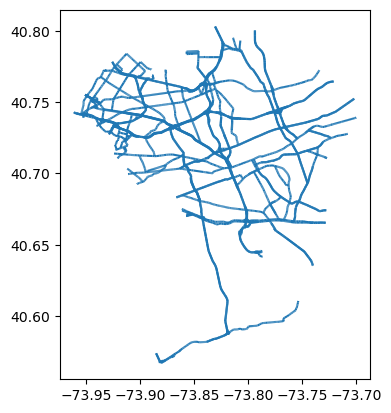

In [41]:
queensdf.plot()

After restricting the geopandas dataframe to just Queens, I converted to a shp file so that networkx could easily read it.
<code>queensdf.to_file('queenstest', driver="GeoJSON")<\code>

In [2]:
truckshapeG = nx.read_shp("New York City Truck Routes_20240606\geo_export_eea34371-355a-42bd-935d-c7f299377428.shp")

In [3]:
truckshapeG.nodes(data=True)

NodeDataView({(-73.9073328972562, 40.853816414220894): {}, (-73.9055700725689, 40.855787322184376): {}, (-73.9034172033414, 40.81150688331628): {}, (-73.90324273473266, 40.8107128849091): {}, (-73.90052119946623, 40.84512281047548): {}, (-73.8993475788999, 40.844737929289245): {}, (-73.83433721039573, 40.872027022621374): {}, (-73.83480217874046, 40.873724509698825): {}, (-73.86497363145573, 40.88066526948053): {}, (-73.86431936139405, 40.88150858337487): {}, (-73.86724818914004, 40.840343803534275): {}, (-73.866361308481, 40.84059268543396): {}, (-73.8647032629666, 40.84155256935982): {}, (-73.86516639854744, 40.842466275615756): {}, (-73.86737121006759, 40.84871631096197): {}, (-73.86739373657203, 40.84877825475126): {}, (-73.87283453865224, 40.83975486303385): {}, (-73.87277204706108, 40.83975128219168): {}, (-73.86725770332306, 40.83162391825064): {}, (-73.86635554693976, 40.83187448379259): {}, (-73.86423976800748, 40.87668340446217): {}, (-73.86337966958081, 40.876410279843626): 

In [26]:
truckshapeQueensG = nx.read_shp("queenstest/queenstest.shp")

In [43]:
nx.info(truckshapeQueensG)

'DiGraph with 9821 nodes and 10738 edges'

In [27]:
truckshapeQueensG.nodes()

NodeView(((-73.81733355000262, 40.664887457826175), (-73.81678511014815, 40.66504635553984), (-73.81938923502359, 40.70764527962604), (-73.81887189553159, 40.70674390854853), (-73.82471753986577, 40.75548753040508), (-73.82397917869169, 40.75486820639349), (-73.77800119765722, 40.71405112390116), (-73.7773063390846, 40.714209316790864), (-73.78301554725067, 40.68427745049191), (-73.78265199381258, 40.683656848693786), (-73.78148411732096, 40.666637473339144), (-73.78037990467637, 40.666710546789325), (-73.73028339485043, 40.71187730235924), (-73.7295879221311, 40.711700466592404), (-73.95122983935411, 40.74070798518572), (-73.94992797659378, 40.740443406788124), (-73.95189452722106, 40.74293762327941), (-73.95179949211075, 40.74301540536097), (-73.95140678404157, 40.74318497690272), (-73.95133730963703, 40.743214970472046), (-73.79011327175367, 40.66597255068964), (-73.78953146911779, 40.666010472063455), (-73.79261990485116, 40.66593968920079), (-73.84669647785617, 40.78597046602155),

First let us visualize node degrees in this network with a frequency historgram.

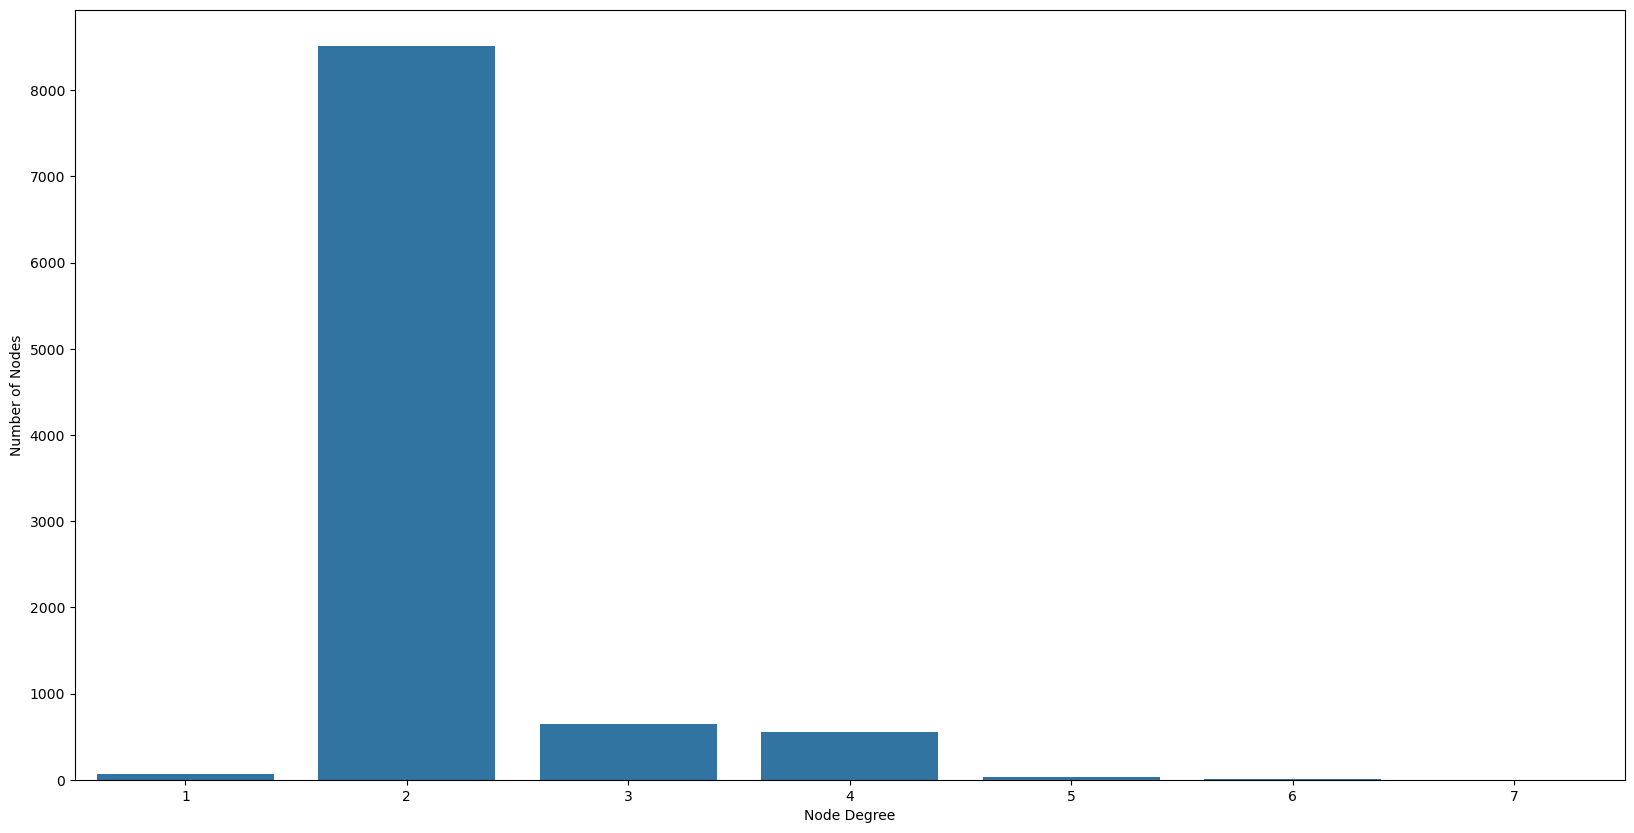

In [82]:
from collections import Counter
degrees = [val for (node, val) in truckshapeQueensG.degree()]
degree_dic = Counter(degrees)

degree_hist = pd.DataFrame({"degree": list(degree_dic.values()),
                            "Number of Nodes": list(degree_dic.keys())})
plt.figure(figsize=(20,10))
sns.barplot(y = 'degree', x = 'Number of Nodes', data = degree_hist)
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes')
plt.tick_params(axis='both')
plt.show()

The simple (undirected) graph looks the same.

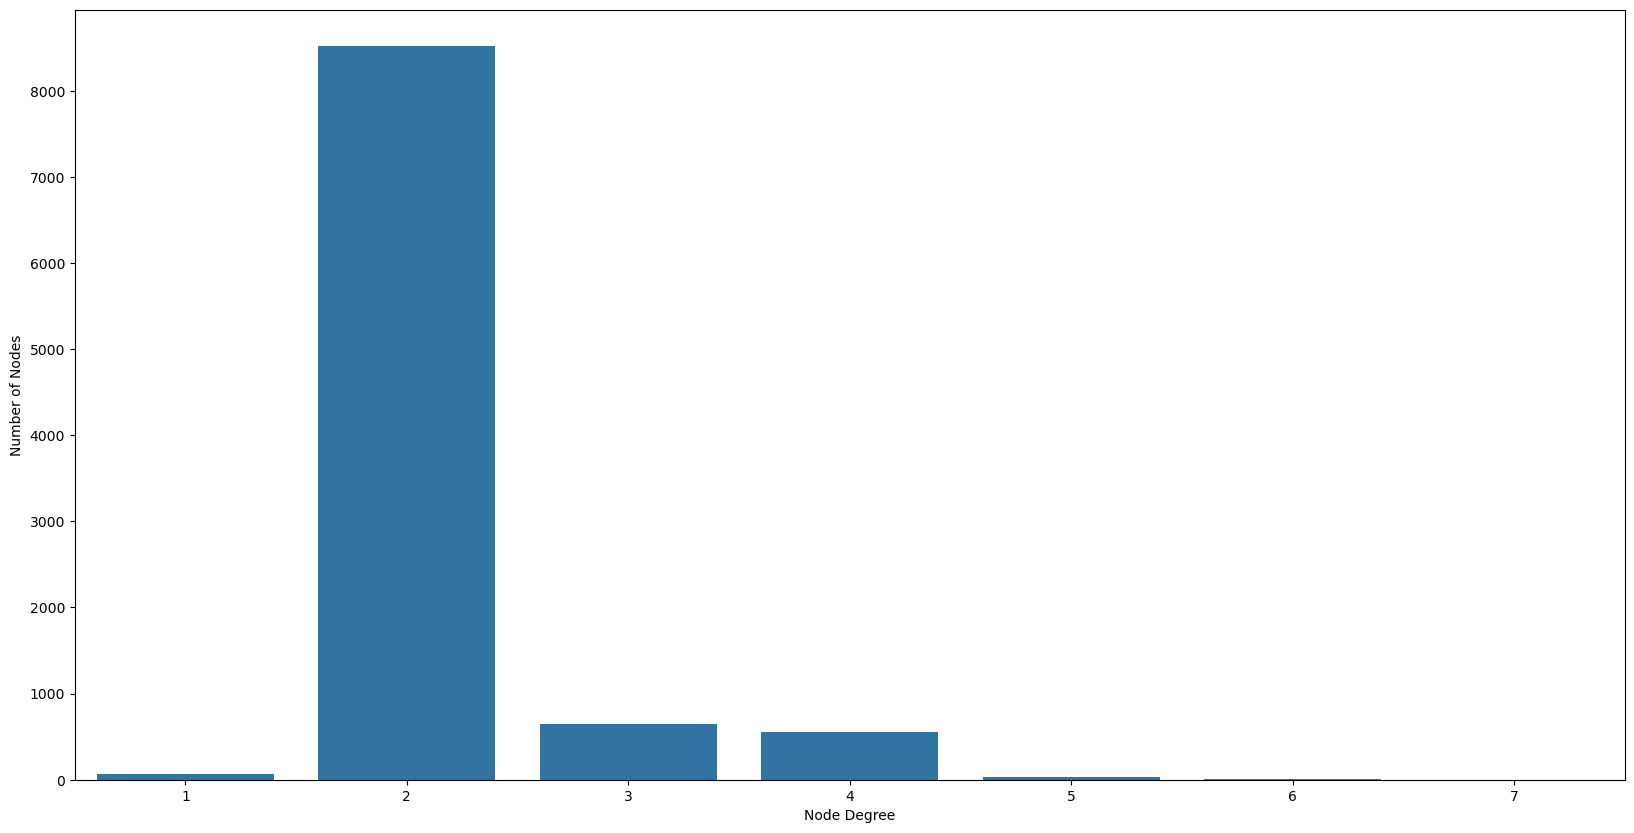

In [81]:
G = nx.Graph(truckshapeQueensG)
degrees = [val for (node, val) in G.degree()]
degree_dic = Counter(degrees)

degree_hist = pd.DataFrame({"degree": list(degree_dic.values()),
                            "Number of Nodes": list(degree_dic.keys())})
plt.figure(figsize=(20,10))
sns.barplot(y = 'degree', x = 'Number of Nodes', data = degree_hist)
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes')
plt.tick_params(axis='both')
plt.show()

Here is a plot of the incoming vs outgoing degree that is close to symmetric, but we have instances of 5 in-degree with 2 out degree on nodes.

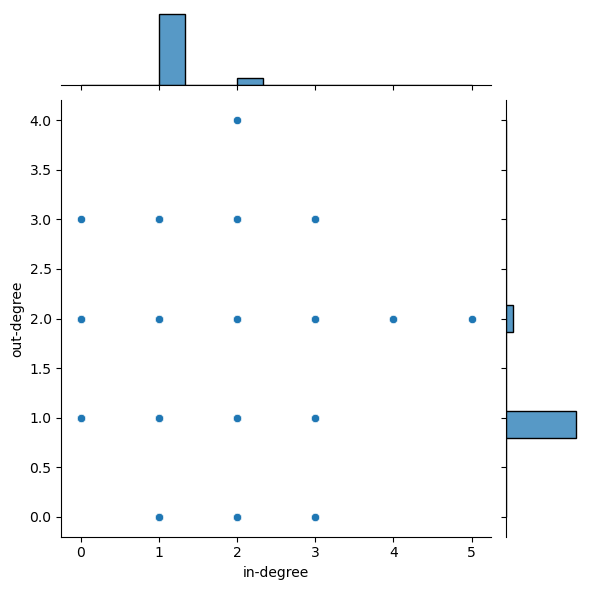

In [77]:
ins = [val for (node, val) in truckshapeQueensG.in_degree()]
outs = [val for (node, val) in truckshapeQueensG.out_degree()]
degrees = pd.DataFrame({"in-degree": ins, "out-degree": outs})

fig = sns.jointplot(x="in-degree",y="out-degree",data=degrees)

The slight difference between in and out degree as well as between directed and undirected may be due to the fact that trucks will not be driving in one-way streets.

As a sanity check, we will look at graph density and expect the number to be closer to 0, as a number closer to 1 is more like a complete graph (every node would be connected to every other node).

In [83]:
nx.density(truckshapeQueensG)

0.00011134127771011493

We have an issue in that the graph is actually not connected. There also aren't any isolated points. There are 2 connected components, so there are two parts of this borough that do not have connected truck lines. However, the second component only has 12 nodes. We shall think about whether or not to drop the second component. For now, we can do more analysis on the first main component, which has 9809 nodes.

In [92]:
list(nx.isolates(G))

[]

In [97]:
len(list(nx.connected_components(G)))

2

In [103]:
len(list(nx.connected_components(G))[0])

9809

In [102]:
len(list(nx.connected_components(G))[1])

12

In [98]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [99]:
S

In [104]:
S[0]

In [105]:
nx.diameter(S[0])

427

In [106]:
nx.average_shortest_path_length(S[0])

143.63278511494505

In [107]:
nx.node_connectivity(G)

0

Connectivity is the minimum number of elements (nodes or edges) that need to be removed to separate the remaining nodes into two or more isolated subgraphs.

In [108]:
nx.node_connectivity(S[0])

1

In [109]:
nx.density(S[0])

0.00022277041243043934